### Optimizers
1) They update the weights and bias<br>

## Types of Optimizers

### 1) Gradient Descent

<b>w_new = w_old - α *(dL/dw_old)</b>

where α = learning rate<br>
1) Gradient Descent uses the whole training data to update weight and bias. Suppose if we have millions of records then training becomes slow and computationally very expensive.

### 2) Stochastic Gradient Descent

<b>w_new = w_old -  α * (dL/dw_old)</b><br>

1) Rather than going for batch processing, this optimizer focuses on performing one stochastic(random) update at a time. It is therefore usually much faster, also the cost function minimizes after each iteration (epoch)<br>
2) SGD solved the Gradient Descent problem by using only single records to updates parameters. But, still, SGD is slow to converge because it needs forward and backward propagation for every record. And the path to reach global minima becomes very noisy.

### 3) Mini Batch Gradient Descent

1) Mini-batch GD overcomes the SGD drawbacks by using a batch of records to update the parameter. Since it doesn't use entire records to update parameter, the path to reach global minima is not as smooth as Gradient Descent.

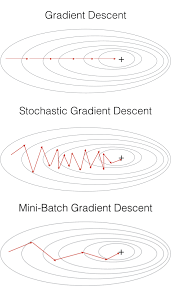


### 4) SGD with Momentum
1) SGD with momentum leads to faster convergence<br>
2) Exponentially Weighted Averages is used in sequential noisy data to reduce the noise and smoothen the data.<br>
3) Thus present Gradient is dependent on its previous Gradient and so on. This accelerates SGD to converge faster and reduce the oscillation.

<img src="sgd_with_momentum.png" align="left">

### 5) Adagrad
1) Unlike Stochastic Gradient descent, this optimizer uses a different learning rate for each iteration(epoch) rather than using the same learning rate for determining all the parameters.<br>
2) Adagrad is well-suited for dealing with sparse data.<br>
3) After a lot of iterations the alpha value becomes very large making the learning rate very small leading to no change between the new and the old weight. This in turn causes the learning rate to shrink and eventually become very small, where the algorithm is not able to acquire any further knowledge.<br>
<img src="adagrad.png" align="left">


### 6) Adadelta

1) This is an extension of the Adaptive Gradient optimizer, taking care of its aggressive nature of reducing the learning rate infinitesimally.

2) Here instead of using the previous squared gradients, the sum of gradients is defined as a reducing weighted average of all past squared gradients(weighted averages) this restricts the learning rate to reduce to a very small value.

3) The idea behind Adadelta is that instead of summing up all the past squared gradients from 1 to “t” time steps, what if we could restrict the window size. For example, computing the squared gradient of the past 10 gradients and average out. This can be achieved using Exponentially Weighted Averages over Gradient.

<img src="adagrad2.png">

The above equation shows that as the time steps “t” increase the summation of squared gradients “α” increases which led to a decrease in learning rate “η”. In order to resolve the exponential increase in the summation of squared gradients “α”, we replaced the “α” with exponentially weighted averages of squared gradients.

<img src="adadelta.png">

Here unlike the alpha “α” in Adagrad, where it increases exponentially after every time step. In Adadelda, using the exponentially weighted averages over the past Gradient, an increase in “Sdw” is under control. 

### 7) Adam (Adaptive Moment Estimation)
1) In addition to storing an exponentially decaying average of past squared gradients like AdaDelta, Adam also keeps an exponentially decaying average of past gradients.

2) Computationally efficient<br>
3) Little memory requirements<br>
4) Appropriate for problems with very noisy/or sparse gradients<br>
<img src="adam1.png" align="left">
<img src="adam2.png" align="left">
<img src="adam3.png" align="left">

## Optimizers Comparision

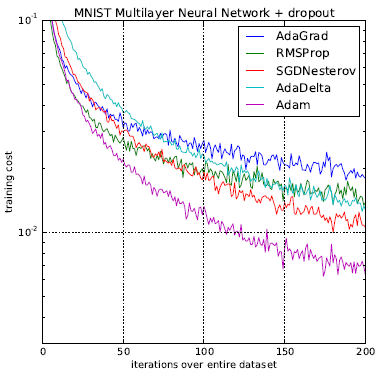

In [1]:
### Sparse matrix

# s = ["welcome to python","python is fun to learn","learning python from scratch python"]
# total_unique_words = 9

# uw = ['fun','from','is','learn','learning','python','scratch','to','welcome']

# sm = [[0 0 0 0 0 1 0 1 1],
#       [1 0 1 1 0 1 0 1 0],
#       [0 1 0 0 1 2 1 0 0]]

### Model Architecture

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense is fully connected layer

### Model building steps using Sequential Layer
1) Create a Sequential Layer<br>
2) Add the required number Dense layers as Hidden layers and Output layer<br>
3) Compile the model with appropriate optimizer and loss function<br>
4) Fit the model on the training data<br>
5) Generate prediction on the test data<br>

### Generalizations
1) Activation Function used in Hidden Layer - relu,leaky_relu<br>
2) Preferred Optimizer - adam<br>
3) For Binary Classifier, activation function used in last layer - sigmoid<br>
4) For Multiclass Classifier, activation function used in last layer - softmax<br>
5) For Regression, activation function used in last layer - linear<br>

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

### Binary Classification

In [5]:
model = Sequential()
model.add(Dense(units=7,activation='relu',input_dim=4))     
# H1 has 7 neurons, Input layer has 4 neurons
model.add(Dense(units=10,activation='relu')) 
# H2 has 10 neurons
model.add(Dense(units=12,activation='relu'))
# H3 has 12 neurons
model.add(Dense(units=1,activation='sigmoid'))  # [0,1]

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()
# H1 params = 4*7 + 7 = 35
# H2 params = 7*10 + 10 = 80
# H3 params = 12*10 + 12 = 132
# Output layer params = 12*1 + 1 = 13

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 7)                 35        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


### Multiclass Classifier

1) Use loss as categorical_crossentropy when target variable in LabelEncoded<br>
2) Use loss as sparse_categorical_crossentropy when target variable in OneHotEncoded<br>

In [5]:
model_mc = Sequential()
model_mc.add(Dense(units=7,activation='relu',input_dim=4))     
# H1 has 7 neurons, Input layer has 4 neurons
model_mc.add(Dense(units=10,activation='relu')) 
# H2 has 10 neurons
model_mc.add(Dense(units=12,activation='relu'))
# H3 has 12 neurons
model_mc.add(Dense(units=5,activation='softmax'))  # 5 categories in the target variable

model_mc.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model_mc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 7)                 35        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 65        
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


### Types of NN

<img src="Types_of_NN.png">

### Weight assignment
kernel-initializer